# EDA QUESTIONS

Does price vary based on location (using zipcodes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
kc_house_data = pd.read_csv('kc_house_data.csv')

In [2]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_data.loc[(kc_house_data['zipcode'] == 98103)].mean()
# average house price in zip code 98103 is ~585,000

id               4.704497e+09
price            5.850488e+05
bedrooms         3.059801e+00
bathrooms        1.934801e+00
sqft_living      1.650831e+03
sqft_lot         3.482445e+03
floors           1.827243e+00
waterfront       0.000000e+00
view             1.447587e-01
condition        3.483389e+00
grade            7.410299e+00
sqft_above       1.405045e+03
yr_built         1.953090e+03
yr_renovated     1.038417e+02
zipcode          9.810300e+04
lat              4.767602e+01
long            -1.223441e+02
sqft_living15    1.524153e+03
sqft_lot15       3.472324e+03
dtype: float64

In [15]:
zipcode_averages = kc_house_data.groupby('zipcode')['price'].mean()
zipcode_averages.head()


zipcode
98001    2.811949e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.356524e+06
98005    8.102897e+05
Name: price, dtype: float64

In [23]:
zipcode_average =zipcode_averages.reset_index()


In [25]:
zipcode_average.head()

,zipcode,price
0,98001,2.811949e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.356524e+06
4,98005,8.102897e+05


In [ ]:
x = zipcode_average['zipcode']
y = zipcode_average['price']

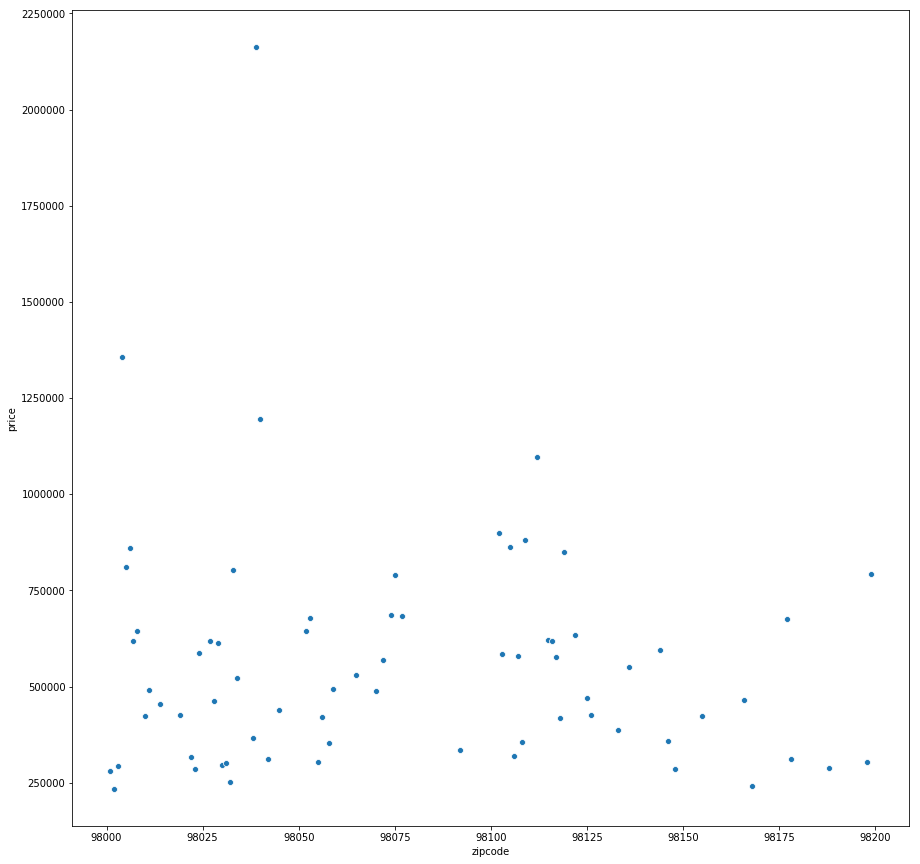

In [37]:
plt.figure(figsize = (15,15))
ax = sns.scatterplot(x = 'zipcode', y = 'price', data = zipcode_average)

# some zipcodes have much higher property prices 

In [40]:
zipcode_average.sort_values(by =['price'], ascending = False)
# expensive properties 

,zipcode,price
24,98039,2.161300e+06
3,98004,1.356524e+06
25,98040,1.194874e+06
48,98112,1.096239e+06
41,98102,8.996077e+05
47,98109,8.800778e+05
43,98105,8.632289e+05
5,98006,8.599386e+05
53,98119,8.497148e+05
4,98005,8.102897e+05


Does living on the waterfront increase property price?

In [61]:
wf_avg = kc_house_data.groupby('waterfront').mean()
wf_avg
# looking at the previous question we found some outliers that may affect price averages
# for our waterfront question we will drop these outliers in order to reduce the bias in our results
# zipcodes 98039, 98040, 98004, 98112 have very expensive property prices
# we think these prices are influenced by factors other than simply being on the waterfront


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,
0.0,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,14991.120210,1.493997,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
1.0,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630


In [62]:
new_wf_avg = wf_avg[~(wf_avg['zipcode'] == 98112)]# & (wf_avg['zipcode'] == 98040) &(wf_avg['zipcode'] == 98004) & (wf_avg['zipcode'] == 98112)]
new_wf_avg

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,
0.0,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,14991.120210,1.493997,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
1.0,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630


In [59]:
on_wf = kc_house_data.loc[kc_house_data['waterfront'] == 1]


array([98070, 98166, 98074, 98034, 98178, 98033, 98040, 98052, 98155,
       98008, 98006, 98075, 98144, 98004, 98199, 98056, 98146, 98023,
       98116, 98027, 98118, 98136, 98105, 98198, 98125, 98115, 98177,
       98039, 98028])

In [73]:
five_two_properties = kc_house_data.loc[kc_house_data['zipcode'] == 98052]
five_two_properties.count()
five_two_properties.loc[five_two_properties['waterfront'] == 1].count()
five_two_properties.loc[five_two_properties['waterfront'] == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1359,1925069082,5/11/2015,2200000.0,5,4.25,4640,22703,2.0,1.0,4.0,...,8,2860,1780.0,1952,0.0,98052,47.6393,-122.097,3140,14200
7359,8917100020,6/6/2014,1150000.0,3,1.50,2170,16600,1.0,1.0,2.0,...,10,1130,1040.0,1979,0.0,98052,47.6307,-122.088,3130,13875
18776,1925069066,6/23/2014,1700000.0,3,2.75,2810,18731,2.0,1.0,4.0,...,10,2810,0.0,1974,0.0,98052,47.6361,-122.093,3120,14810


In [75]:
three_nine_properties = kc_house_data.loc[kc_house_data['zipcode'] == 98039]
three_nine_properties.loc[three_nine_properties['waterfront'] == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15241,2425049063,9/11/2014,3640000.0,4,3.25,4830,22257,2.0,1.0,4.0,...,11,4830,0.0,1990,0.0,98039,47.6409,-122.241,3820,25582


In [70]:
five_two_properties_wf = five_two_properties.groupby('waterfront')
five_two_avg = five_two_properties_wf.mean()
five_two_avg

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,
0.0,5.087812e+09,6.383482e+05,3.598410,2.358847,2349.001988,11020.415507,1.583499,0.047714,3.308151,8.170974,2100.333996,1985.316103,33.900726,98052.0,47.680704,-122.119911,2315.067594,10014.131213
1.0,4.255746e+09,1.683333e+06,3.666667,2.833333,3206.666667,19344.666667,1.666667,3.333333,4.000000,9.333333,2266.666667,1968.333333,0.000000,98052.0,47.635367,-122.092667,3130.000000,14295.000000


In [76]:
# there seems to be some positive correlation between being on the waterfront
# and house prices, but there seems to be a lot of missing data on the waterfront variable

Did house size change over time?

In [98]:
averages_by_year = kc_house_data.groupby('yr_built')['sqft_living'].mean()
averages_by_year.head()

yr_built
1900    1732.011494
1901    1763.620690
1902    1919.629630
1903    1507.739130
1904    1603.177778
Name: sqft_living, dtype: float64

In [96]:
average_by_year = averages_by_year.reset_index()


In [99]:
average_by_year.sort_values(by =['sqft_living'], ascending = False)
average_by_year.head()


,yr_built,sqft_living
0,1900,1732.011494
1,1901,1763.620690
2,1902,1919.629630
3,1903,1507.739130
4,1904,1603.177778


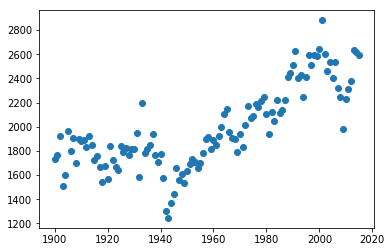

In [100]:
x = average_by_year['yr_built']
y = average_by_year['sqft_living']

plt.scatter(x,y)

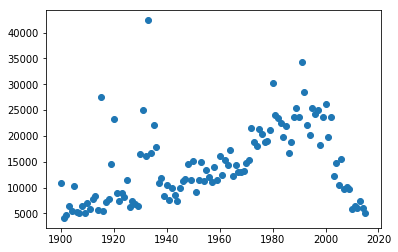

In [101]:
averages_lot = kc_house_data.groupby('yr_built')['sqft_lot'].mean()
average_lot = averages_lot.reset_index()
x = average_lot['yr_built']
y = average_lot['sqft_lot']

plt.scatter(x, y)

Is house price correlated with year built 

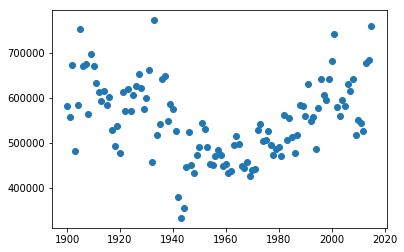

In [104]:
averages_price = kc_house_data.groupby('yr_built')['price'].mean()
average_price = averages_price.reset_index()
x = average_price['yr_built']
y = average_price['price']

plt.scatter(x, y)